<a href="https://colab.research.google.com/github/neerajthandayan/CourseProject/blob/main/Notebooks/Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook for Data Visualisation

In [1]:
# Importing libraries

from plotnine import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Visualisation of Stop and Search Rate by Ethinicity

In [2]:
# Importing the PFA population data and Stop & Search Data

ss_data = pd.read_csv('https://raw.githubusercontent.com/neerajthandayan/CourseProject/main/Data/ss_data.csv', index_col=0)
pop_data = pd.read_csv('https://raw.githubusercontent.com/neerajthandayan/CourseProject/main/Data/pop_data.csv', index_col=0)
tots_rate = ss_data.merge(pop_data, on='Geography')
tots_rate.head()

,Geography,SS_White,SS_Black,SS_Asian,SS_Other,SS_Mixed,White,Black,Asian,Other,Mixed
0,Cleveland,28793.0,227.0,605.0,150.0,136.0,526456,3156,17419,4434,5762
1,Durham,4848.0,15.0,15.0,10.0,14.0,605364,1058,5114,3030,4240
2,Northumbria,42225.0,189.0,864.0,49.0,114.0,1343747,9006,37782,17871,12447
3,Cheshire,5746.0,64.0,63.0,78.0,51.0,995998,3264,12794,5230,10423
4,Cumbria,9652.0,29.0,54.0,11.0,31.0,492257,579,2913,1605,2504


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


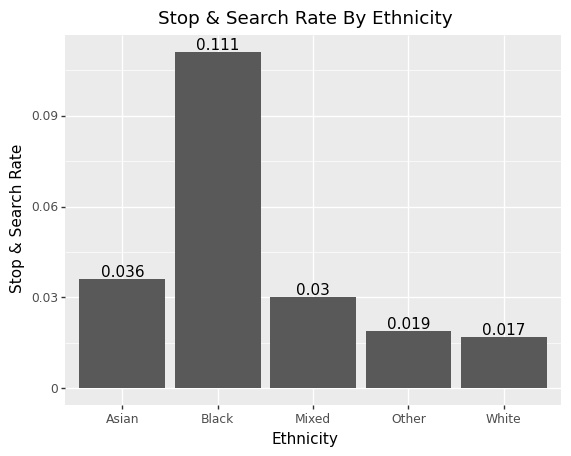

<ggplot: (8785925481601)>

In [3]:
x = tots_rate.iloc[:,1:6].sum().values/tots_rate.iloc[:,6:].sum().values
y = tots_rate.columns[6:]
df = pd.DataFrame({'Ethnicity':y, 'SRate':np.round(x,3)})

# Ploting Stop and Serch Rate for Country
ss_plot = ggplot(df,aes(y='SRate', x='Ethnicity')) + \
geom_bar(stat='identity') + \
geom_text(aes(label='SRate'), vjust='bottom') + \
ylab('Stop & Search Rate') + \
ggtitle('Stop & Search Rate By Ethnicity')

ss_plot
#ss_plot.save('ss_plot.png')

## Goepandas Visuaisation of Bias, Racist Incidents, Ethnic Diversity and Police Department Diversity

In [4]:
# Installing and Importing Goepandas

!pip install geopandas
import geopandas as gpd

In [5]:
# Importing Shape File of UK Police Force Areas

!wget "https://github.com/neerajthandayan/CourseProject/blob/main/Data/Police_Force_Areas_(December_2016)_Boundaries.zip?raw=true"
import zipfile
with zipfile.ZipFile('/content/Police_Force_Areas_(December_2016)_Boundaries.zip?raw=true', 'r') as zip_ref:
    zip_ref.extractall()

--2021-04-27 23:56:42--  https://github.com/neerajthandayan/CourseProject/blob/main/Data/Police_Force_Areas_(December_2016)_Boundaries.zip?raw=true
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/neerajthandayan/CourseProject/raw/main/Data/Police_Force_Areas_(December_2016)_Boundaries.zip [following]
--2021-04-27 23:56:42--  https://github.com/neerajthandayan/CourseProject/raw/main/Data/Police_Force_Areas_(December_2016)_Boundaries.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/neerajthandayan/CourseProject/main/Data/Police_Force_Areas_(December_2016)_Boundaries.zip [following]
--2021-04-27 23:56:42--  https://raw.githubusercontent.com/neerajthandayan/CourseProject/main/Data/Police_Force_Areas_(December_2016)_Boundaries.zip
Resolving raw.git

In [6]:
# Creating shape file DataFrame

map_df = gpd.read_file('/content/Police_Force_Areas_(December_2016)_Boundaries.shp')
map_df.head()

,objectid,pfa16cd,pfa16nm,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,E23000001,Metropolitan Police,517516,178392,-0.30864,51.492271,1.570606e+09,424522.342920,"MULTIPOLYGON (((531643.597 200802.700, 531658...."
1,2,E23000002,Cumbria,341868,527389,-2.90218,54.638260,6.822195e+09,987067.168716,"MULTIPOLYGON (((357067.497 586765.599, 357029...."
2,3,E23000003,Lancashire,363669,441026,-2.55392,53.864182,3.076413e+09,795005.042947,"MULTIPOLYGON (((370171.702 482434.604, 370185...."
3,4,E23000004,Merseyside,344324,390164,-2.83893,53.405350,6.467317e+08,280940.941577,"MULTIPOLYGON (((336272.101 422872.103, 336303...."
4,5,E23000005,Greater Manchester,377940,401102,-2.33407,53.506149,1.275981e+09,248705.576852,"POLYGON ((391363.101 420849.902, 391421.401 42..."


In [7]:
# Fectching Data from repo
ed = pd.read_csv('https://raw.githubusercontent.com/neerajthandayan/CourseProject/main/Data/ethnic_diversity.csv', index_col=0)
pld = pd.read_csv('https://raw.githubusercontent.com/neerajthandayan/CourseProject/main/Data/police_diversity.csv', index_col=0)
ri = pd.read_csv('https://raw.githubusercontent.com/neerajthandayan/CourseProject/main/Data/racist_incidents.csv', index_col=0)
bais = pd.read_csv('https://raw.githubusercontent.com/neerajthandayan/CourseProject/main/Data/Police_Bias_1.csv', index_col=0)

# Merging Data DataFrames
m_data = ed.merge(pld.merge(ri.merge(bais,on='Geography'),on='Geography'),on='Geography')
m_data.rename(columns={'Geography':'pfa16nm'}, inplace=True)
m_data.head()

,pfa16nm,Diversity_Score,PD_Diversity,RI_Rate,Bias
0,Bedfordshire,0.378451,0.115899,0.011177,0.000098
1,Cambridgeshire,0.181917,0.047769,0.007211,0.000161
2,Cheshire,0.060466,0.021843,0.006625,0.000037
3,Cleveland,0.106214,0.035654,0.013326,0.000300
4,Cumbria,0.030111,0.021202,0.008032,0.000225


In [8]:
# Merging DataFrames

master = map_df.merge(m_data, on='pfa16nm')
master.head()

,objectid,pfa16cd,pfa16nm,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,Diversity_Score,PD_Diversity,RI_Rate,Bias
0,1,E23000001,Metropolitan Police,517516,178392,-0.30864,51.492271,1.570606e+09,424522.342920,"MULTIPOLYGON (((531643.597 200802.700, 531658....",0.591174,0.190240,0.011306,0.002172
1,2,E23000002,Cumbria,341868,527389,-2.90218,54.638260,6.822195e+09,987067.168716,"MULTIPOLYGON (((357067.497 586765.599, 357029....",0.030111,0.021202,0.008032,0.000225
2,3,E23000003,Lancashire,363669,441026,-2.55392,53.864182,3.076413e+09,795005.042947,"MULTIPOLYGON (((370171.702 482434.604, 370185....",0.177808,0.069868,0.016645,0.000223
3,4,E23000004,Merseyside,344324,390164,-2.83893,53.405350,6.467317e+08,280940.941577,"MULTIPOLYGON (((336272.101 422872.103, 336303....",0.106096,0.066472,0.012945,0.000226
4,5,E23000005,Greater Manchester,377940,401102,-2.33407,53.506149,1.275981e+09,248705.576852,"POLYGON ((391363.101 420849.902, 391421.401 42...",0.287564,0.090978,0.014226,0.000140


In [9]:
# Function to plot geoplots

def para_plot(df,param,title):
  fig, ax = plt.subplots(1, figsize=(8,10))
  ax = plt.axes(frameon=True,title=title)
  ax.set_yticklabels([])
  ax.set_xticklabels([])
  return df.plot(column=param, cmap='binary', linewidth=0.8, ax=ax, edgecolor='0.8')

#### Ethinic Diversity Plot



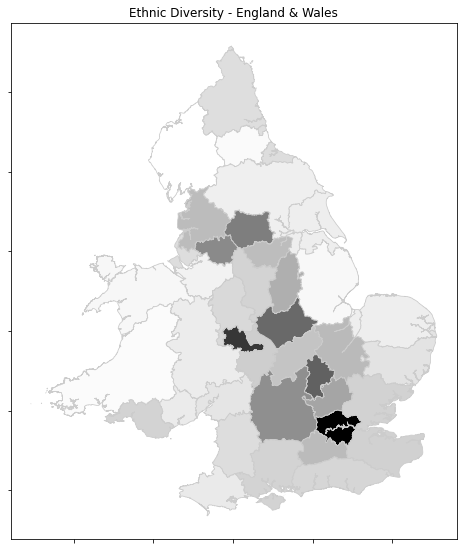

In [10]:
para_plot(master,'Diversity_Score','Ethnic Diversity - England & Wales')

#### Police Dept. Diversity

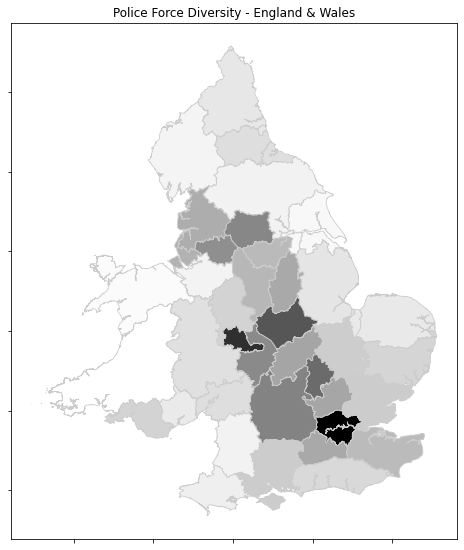

In [11]:
para_plot(master,'PD_Diversity','Police Force Diversity - England & Wales')

#### Racist Incident Plot

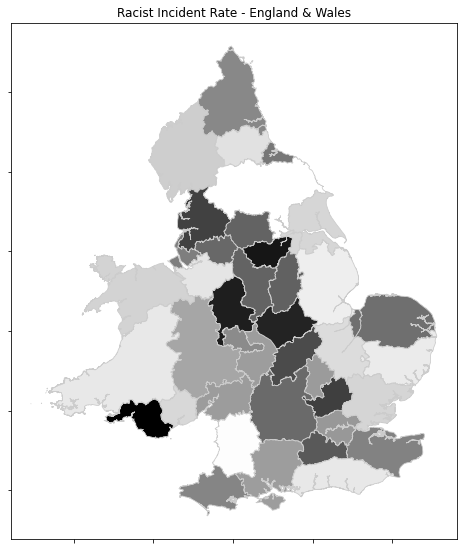

In [12]:
para_plot(master,'RI_Rate','Racist Incident Rate - England & Wales')

#### Police Bias Plot

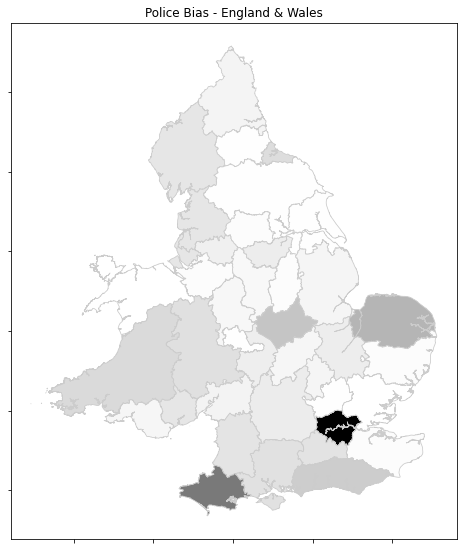

In [13]:
bias_plot = para_plot(master,'Bias','Police Bias - England & Wales')